## <center> Binary Classiﬁcation <center>

In [2]:
# imports 
import pandas as pd 
from sklearn.model_selection import train_test_split
from functions import removeNonAlphanumeric, toNumeric, target_variable_exploration,handleMissing, plot_categ, plot_numeric
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


## 1).  Chronic Kidney Disease: 

In [3]:
# Load data 
data = pd.read_csv(r'./data/kidney_disease.csv')
# Split it to train and test
train_data, test_data = train_test_split(data) 

In [13]:
train_data = train_data.set_index('id')
train_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
92,71.0,70.0,1.010,3.0,0.0,normal,abnormal,present,present,219.0,...,33,5600,3.6,yes,yes,yes,good,no,no,ckd
188,8.0,NaN,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,80.0,...,38,NaN,NaN,no,\tno,no,good,no,no,ckd
247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,150.0,...,NaN,NaN,NaN,no,no,no,poor,yes,yes,ckd
375,70.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,74.0,...,48,9700,5.6,no,no,no,good,no,no,notckd
147,60.0,60.0,1.010,3.0,1.0,normal,abnormal,present,notpresent,288.0,...,25,15200,3.0,yes,no,no,poor,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,34.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,91.0,...,48,8600,4.9,no,no,no,good,no,no,notckd
340,32.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,43,6700,5.9,no,no,no,good,no,no,notckd
351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,40,9900,4.7,no,no,no,good,no,no,notckd


In [14]:
#Get the shape of the data (the number of rows & columns)
print(train_data.shape)
# Statistical description of training data set
print(train_data.describe())

(300, 25)
              age          bp          sg          al          su         bgr  \
count  292.000000  295.000000  265.000000  266.000000  263.000000  268.000000   
mean    51.085616   76.033898    1.017264    1.026316    0.418251  145.022388   
std     17.197944   13.882361    0.005884    1.363702    1.022630   74.082803   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   98.000000   
50%     54.500000   70.000000    1.020000    0.000000    0.000000  120.500000   
75%     64.250000   80.000000    1.020000    2.000000    0.000000  165.000000   
max     83.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  288.000000  289.000000  235.000000  235.000000  263.000000  
mean    58.869792    2.976298  138.127660    4.712766   12.415589  
std     52.410646    4.592510    7.281921    3.660637   

### Data Cleaning

In [15]:
data['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

There is noise in data. As we can see, 'no' and '\tno' are considered as two modalities. 

In [16]:
# Remove non alphanumeric 
train_data = removeNonAlphanumeric(train_data)
train_data = toNumeric(train_data)


In [17]:
# Get columns with null values
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())
# Handle missing values
df,imput_dict = handleMissing(train_data, "most_frequent")
print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
For non numeric columns, most frequent strategy is used
Columns with null values after imputing
[]


### Data visualization

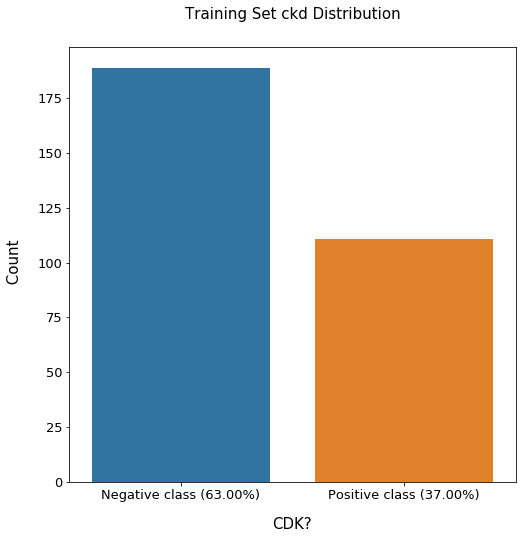

In [19]:
### Target variable exploration

target_variable_exploration(train_data, "classification", 'CDK?', ' Count', 'Training Set ckd Distribution')

La distribution des classes est assez équilibrée.

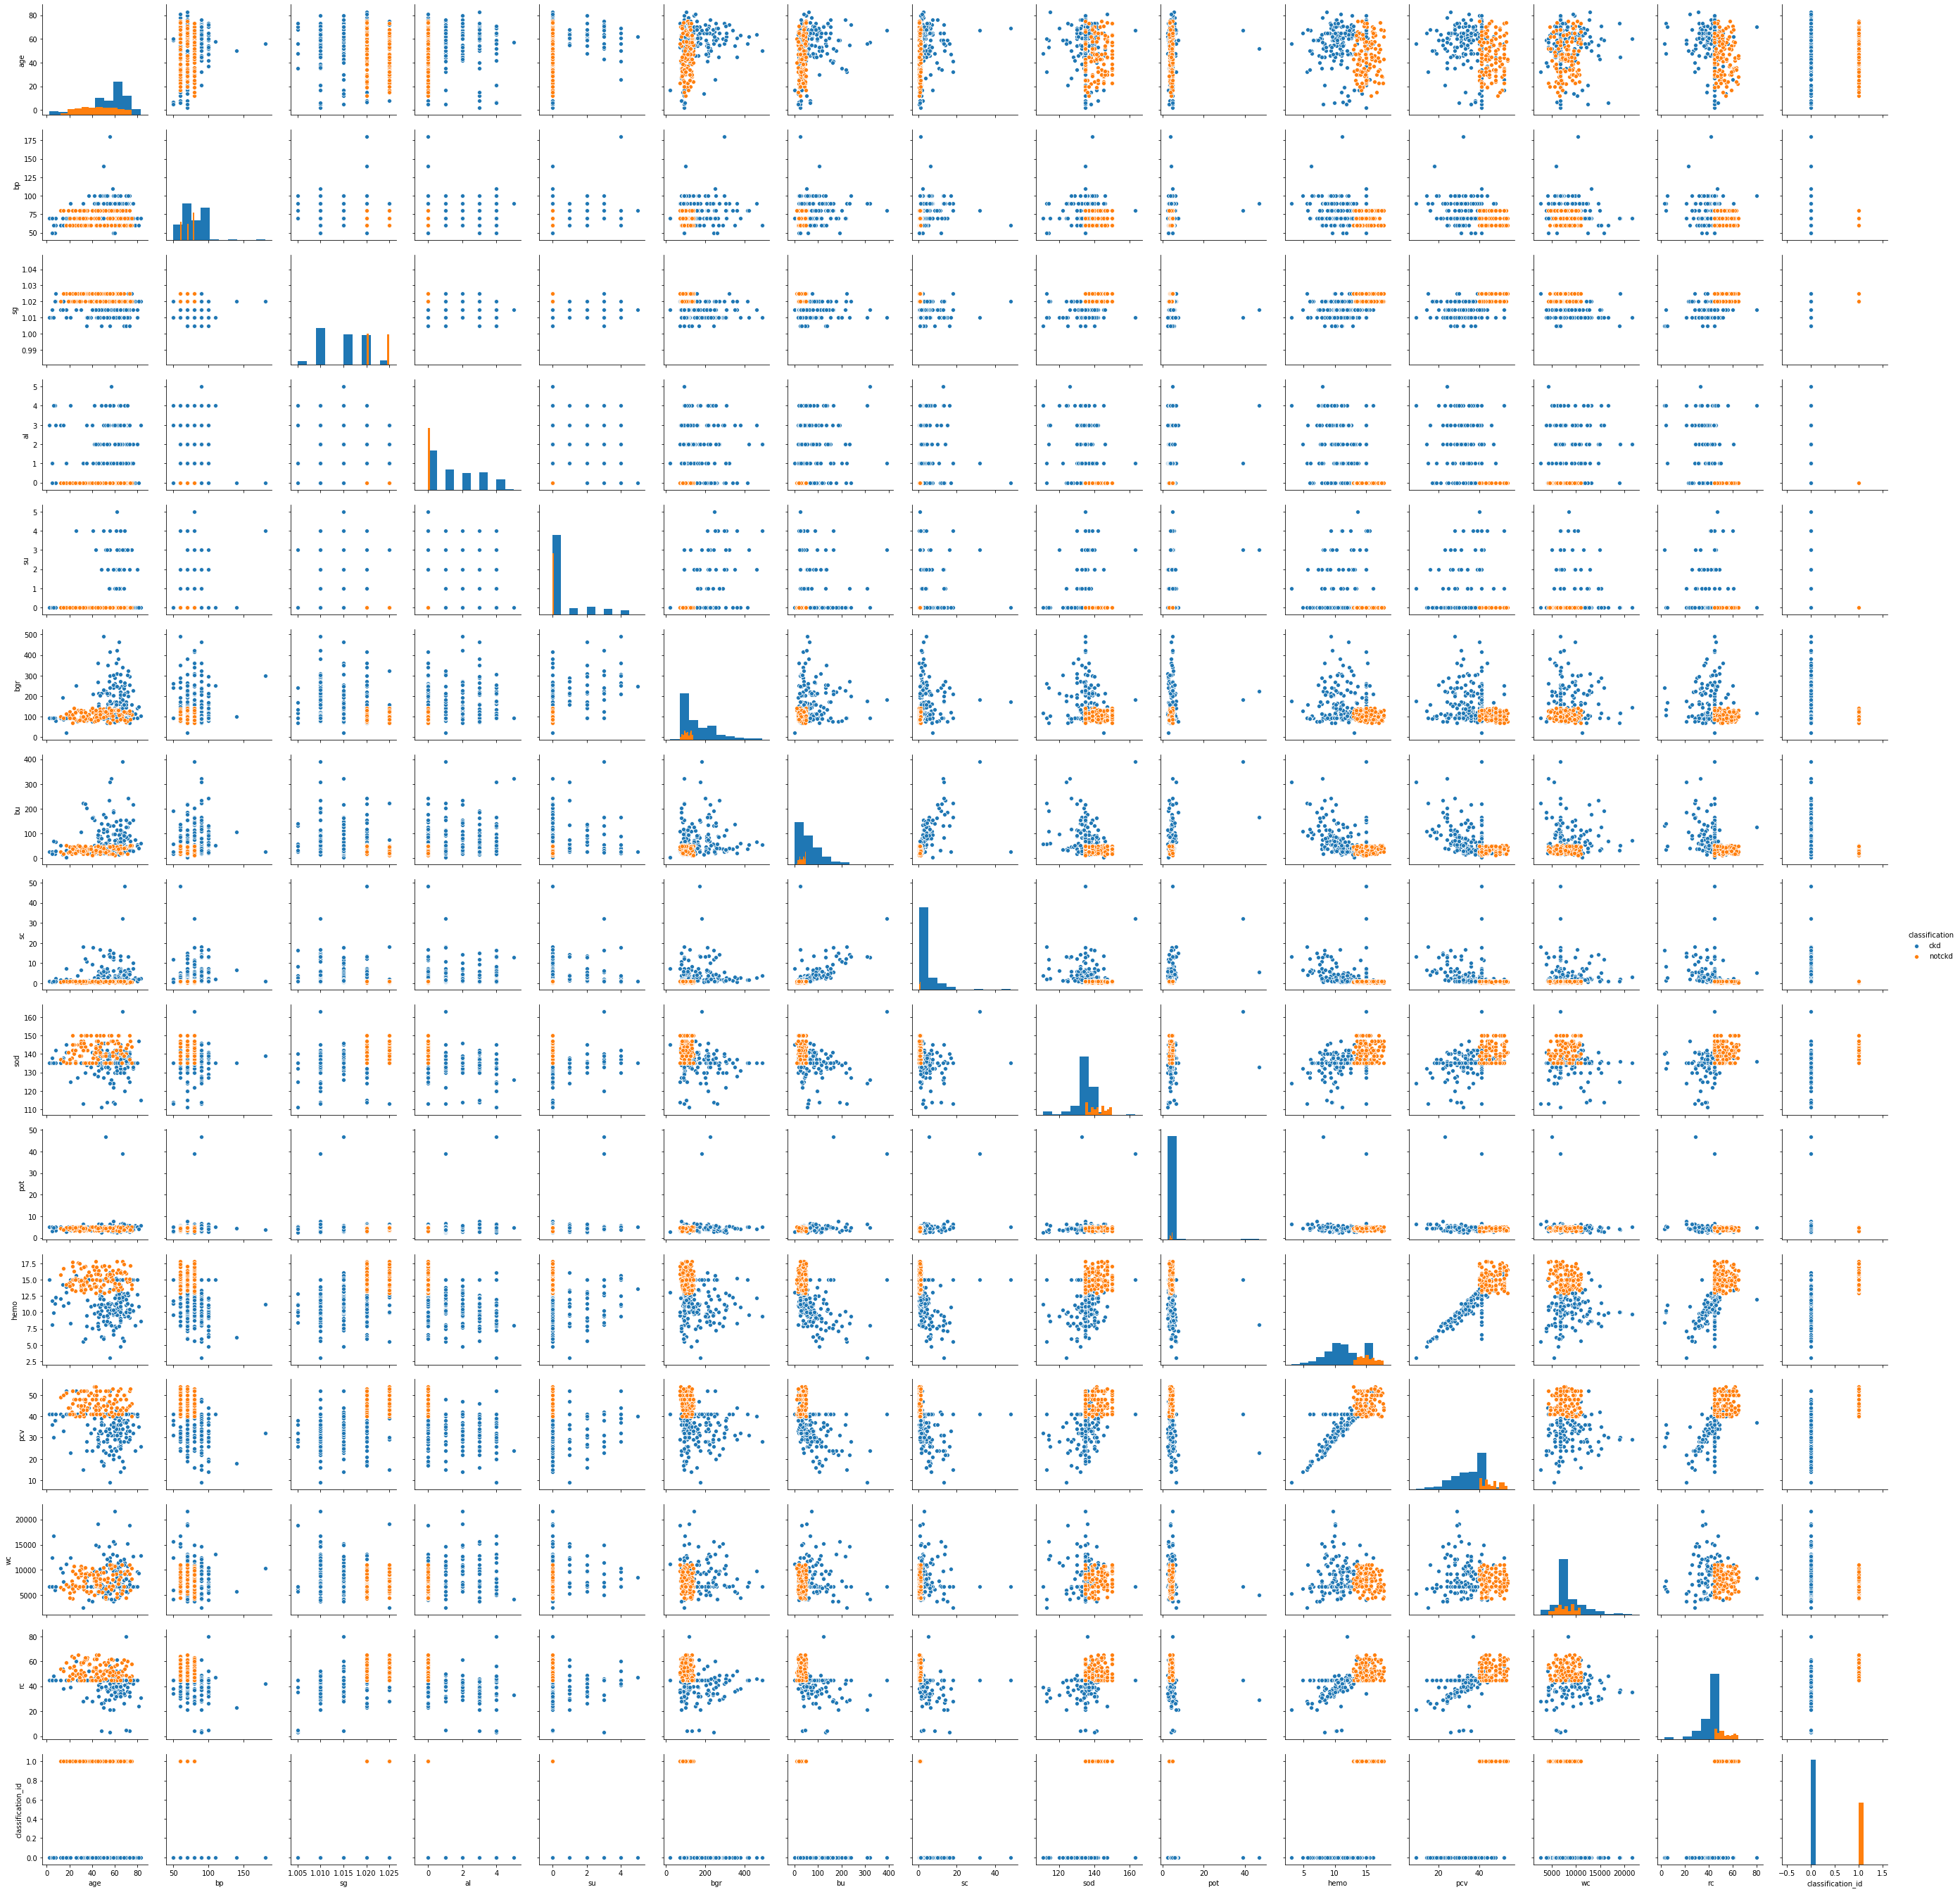

In [24]:
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

### Analyse :
    - Pour les variable "RC", "WC", "pvc", "hemo", "sod", les grands valeurs correspondent à des plus grandes probabilités de non cdk
    - Corrélation lineare entre pvc et hemo"
    _ ba une modalité n'a que des valeurs ckd

In [25]:
pwd

'C:\\Users\\akhdi'

C:\Users\akhdi\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


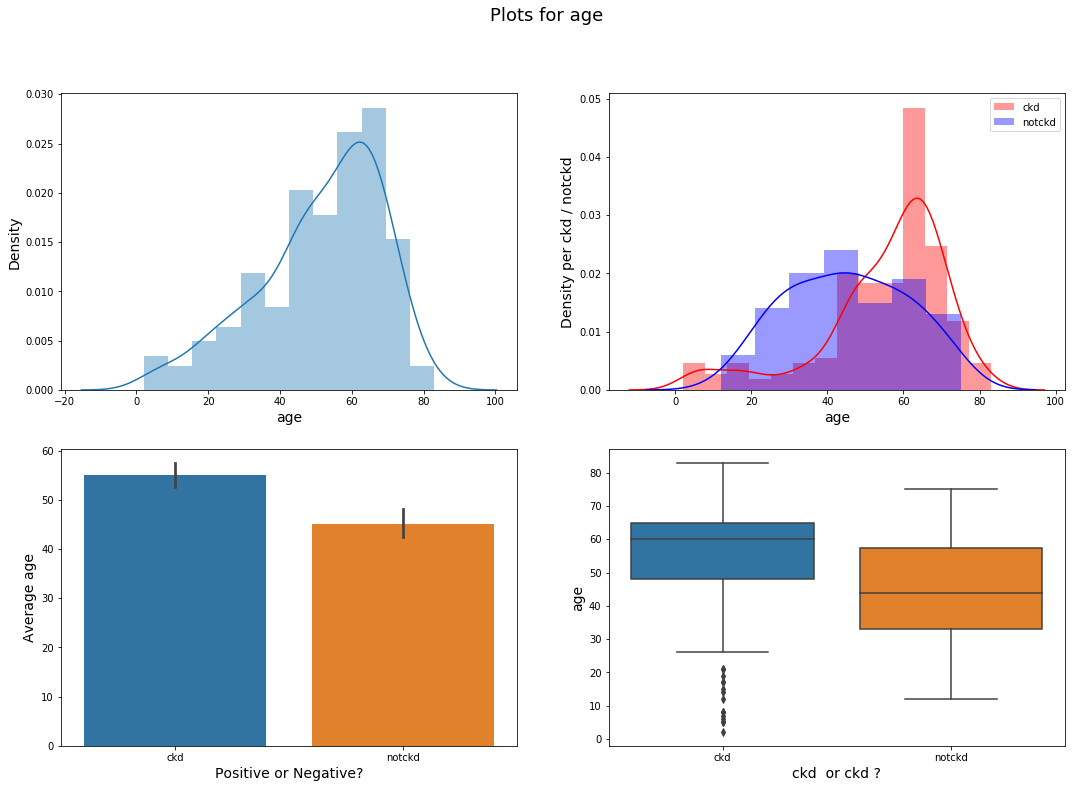

C:\Users\akhdi\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


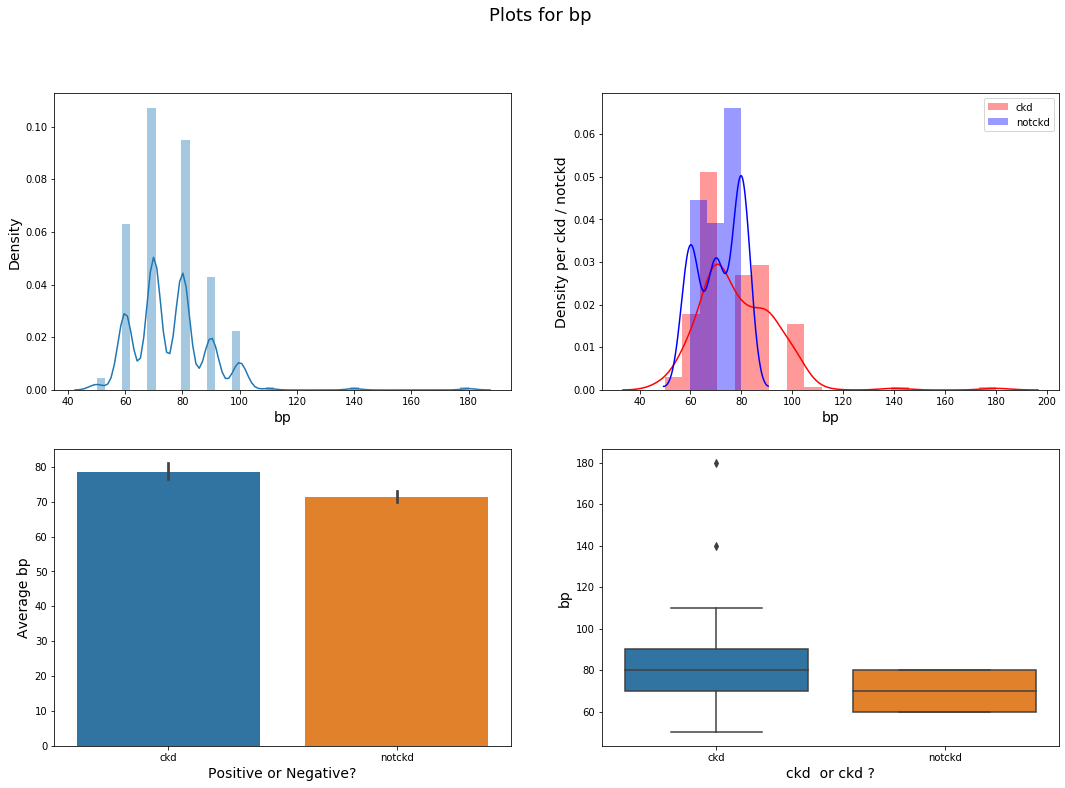

C:\Users\akhdi\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


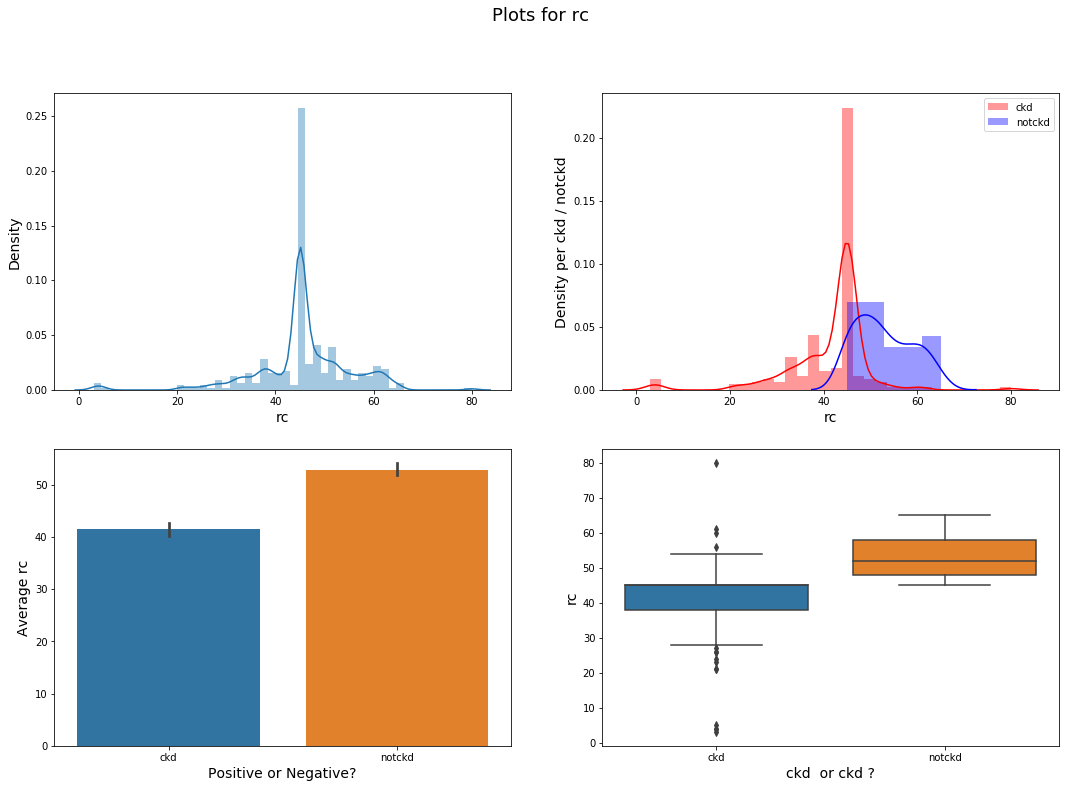

In [22]:
### Plotting Numeric Features



plot_numeric(train_data, ['age','bp', "rc"], 'classification')


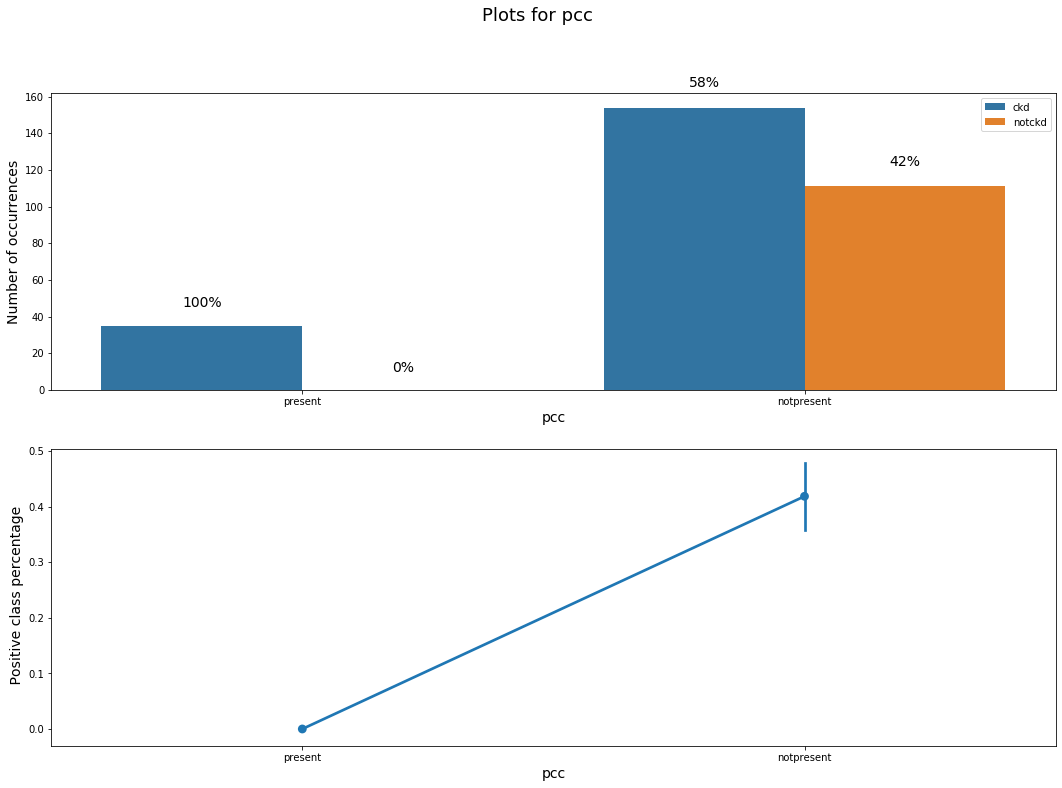

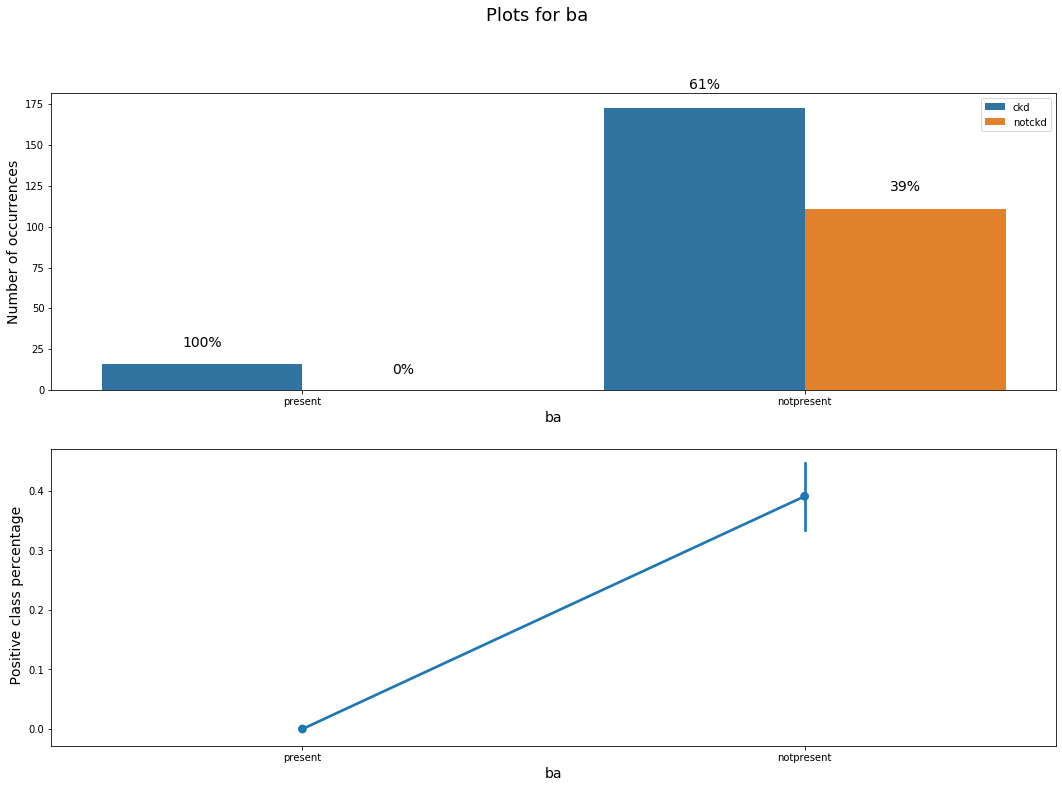

In [23]:
##### Plotting nominal Categorical Features        
plot_categ(train_data,"classification", ["pcc","ba"])

In [59]:
def removeNonAlphanumeric(df) :
    for c in df.columns :
        if df[c].dtype == "O" :
            df[c] = df[c].str.replace('\t', '')
            df[c] = df[c].str.replace('[^a-zA-Z0-9]', '')
    df = df.replace('',np.nan)
    return df

def toNumeric(df):
    for c in df.columns :
        if df[c].dtype == "O" and all(df[c].str.isnumeric()):
            df[c] = pd.to_numeric(df[c])
    return df
            

<Figure size 432x288 with 0 Axes>

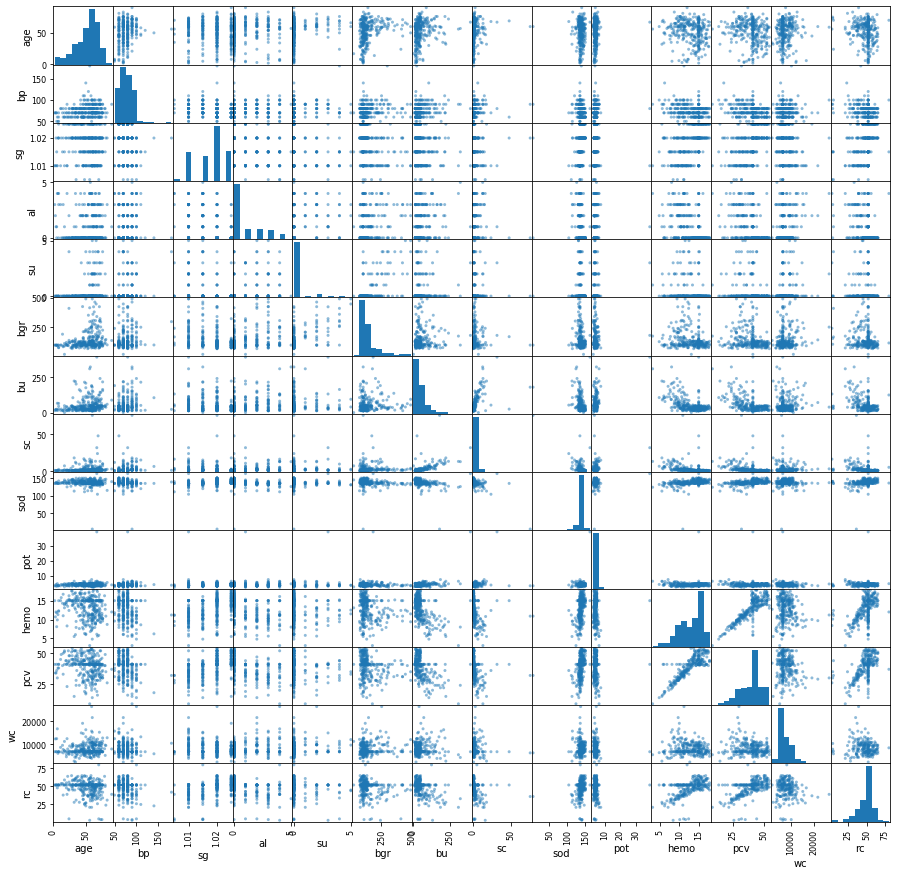

<Figure size 432x288 with 0 Axes>

In [82]:
pd.plotting.scatter_matrix(train_data,figsize=(15,15))
plt.show()